In [41]:
import numpy as np
import os.path as osp
import dgl
from dgl.data import FraudDataset

print(osp)
# dataset = FraudDataset('yelp', raw_dir= osp.join(osp.expanduser('~'), '.dgl/dataset/'))


<module 'posixpath' from '/home/wangguifeng/anaconda3/envs/pytorch/lib/python3.8/posixpath.py'>


In [19]:
import torch_geometric
from torch_geometric.datasets import BitcoinOTC, UPFD
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
from torch_geometric.loader import DataLoader

otc_root = osp.join(osp.expanduser('~'), 'datasets/Bitcoin-OTC/')
dataset3 = BitcoinOTC(root=otc_root)
dataset3
data = dataset3[2]
label = data.edge_attr
label 
data
otc_data_loader = DataLoader(dataset3, batch_size=16, shuffle=True)
for data in otc_data_loader:
    break
data

BitcoinOTC(138)

tensor([ 4,  2,  1,  7,  8,  8,  1,  5,  5,  5,  8,  8,  9,  7,  5,  1,  8,  7,
         8,  1, 10,  7,  7,  1,  1,  3,  3,  1,  4,  2,  5,  5,  1,  2,  2,  2,
         2,  2,  1,  2,  1,  8,  1,  1,  1,  1,  1,  1,  1,  1,  5,  3,  9,  2,
         3,  2,  3,  1,  1,  1,  9,  3,  2,  2,  1,  1,  1,  3,  1,  1,  1,  1,
         1,  1,  2,  1,  1,  1,  1,  1,  1,  2,  2,  2,  2,  2,  1,  1,  6,  2,
         2,  2,  2,  3,  4,  4,  4,  1,  1,  2,  5])

Data(edge_index=[2, 101], edge_attr=[101], num_nodes=6005)

DataBatch(edge_index=[2, 46689], edge_attr=[46689], num_nodes=96080, batch=[96080], ptr=[17])

In [43]:
import collections

count_edge = []
weight_range = range(-10,10)
for data in dataset3:
    d = collections.Counter(list(data.edge_attr.numpy()))
    temp = []
    for i in weight_range:
        temp.append(d[i])
    count_edge.append(temp)

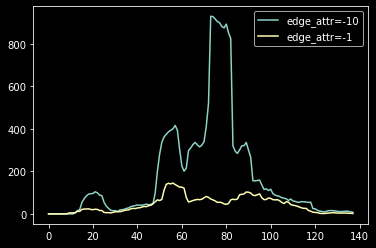

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('display.max_rows',200)
pd.set_option('display.max_columns',30)
pd_count_edge = pd.DataFrame(np.array(count_edge))
# plot the number of samples with edge_attr=-10 in each graph(xaxis = 138 graphs)
plt.plot(range(len(count_edge)), pd_count_edge[0],label='edge_attr=-10');
# plot the number of samples with edge_attr=-1 in each graph(xaxis = 138 graphs)
plt.plot(range(len(count_edge)), pd_count_edge[9],label='edge_attr=-1');
plt.legend();


In [20]:
from torch_geometric.datasets import UPFD
from torch_geometric.transforms import ToUndirected
import os.path as osp

upfd_root = osp.join(osp.expanduser('~'), 'datasets/UPFD/')
upfd_data_name = ['politifact', 'gossipcop']
upfd_data_feature = ['profile', 'spacy', 'bert', 'content']
train_dataset = UPFD(upfd_root, upfd_data_name[0],  upfd_data_feature[0], 'train', ToUndirected())
len(train_dataset)
train_dataset[1]

62

Data(x=[32, 10], edge_index=[2, 62], y=[1])

In [16]:
from torch_geometric.loader import DataLoader
train_loader = DataLoader(train_dataset, batch_size=30, shuffle=True)
for data in train_loader:
    break
data

DataBatch(x=[3481, 10], edge_index=[2, 6902], y=[30], batch=[3481], ptr=[31])

In [9]:
from dgl.data import BitcoinOTCDataset
otc_dataset = BitcoinOTCDataset(raw_dir= osp.join(osp.expanduser('~'), 'datasets/Bitcoin-OTC/'))
len(otc_dataset)
data2 = otc_dataset[0]
data2.num_edges

136

In [10]:
data = dataset[0]


In [11]:
data


Graph(num_nodes={'review': 45954},
      num_edges={('review', 'net_rsr', 'review'): 6805486, ('review', 'net_rtr', 'review'): 1147232, ('review', 'net_rur', 'review'): 98630},
      metagraph=[('review', 'review', 'net_rsr'), ('review', 'review', 'net_rtr'), ('review', 'review', 'net_rur')])

In [ ]:
data.ndata['feature'].shape

In [14]:
data.edge_ids

<bound method DGLHeteroGraph.edge_ids of Graph(num_nodes={'review': 45954},
      num_edges={('review', 'net_rsr', 'review'): 6805486, ('review', 'net_rtr', 'review'): 1147232, ('review', 'net_rur', 'review'): 98630},
      metagraph=[('review', 'review', 'net_rsr'), ('review', 'review', 'net_rtr'), ('review', 'review', 'net_rur')])>

In [2]:
from torch_geometric.utils import k_hop_subgraph, subgraph, get_laplacian, to_dense_adj
import torch
import numpy as np

node_idx = [2,3,4,5]
edge_index = np.array([[1,2],[1,3],[3,4],[2,4],[2,7],[3,7],[1,5],[4,5],[4,6],[6,8],[4,8]]).T
edge_index = torch.tensor(edge_index).type(torch.LongTensor)
# res = k_hop_subgraph([3], 2, edge_index)
# res = subgraph(node_idx, edge_index)
L = to_dense_adj(get_laplacian(edge_index, normalization='sym')[0])

In [1]:
EigVals, EigVecs = torch.linalg.eigh(L)
EigVals


NameError: name 'torch' is not defined

In [6]:
EigVecs

tensor([[[1., 0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 1., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 1., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 1., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 1., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 1., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 1., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 1., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0., 1.]]])